<a href="https://colab.research.google.com/github/AndersonLopesbh/I.S/blob/main/Analises%20IS/Script_python/Analises_IS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Proposta de Trabalho

Avaliação de Competências Técnicas de Analíticas para Desenvolvedor de Banco de Dados em Python (DBM)

**Objetivo:** Esta avaliação visa analisar suas habilidades técnicas em Python, capacidades analíticas e estatísticas, e sua resposta a situações adversas e desconhecidas, usando o dataset do Censo Escolar de 2022, com foco específico em análise de perfil para prospecção em escolas particulares.

**Dataset:**
 O dataset pode ser acessado através do link: Censo Escolar 2022 - Dados Abertos.

**Tarefas:**
Extração e Tratamento de Dados: Extraia os dados relevantes, com ênfase nas escolas particulares. Realize a limpeza e organização dos dados, excluindo informações não relacionadas ao objetivo do estudo (como campos de saneamento básico), e tratando inconsistências.

**Análise Exploratória e Foco do Estudo:**
Conduza uma análise exploratória focada em identificar informações úteis para a prospecção em escolas particulares. Identifique e justifique quais campos são relevantes para o objetivo do estudo.

**Análise Estatística:**
Aplique técnicas de estatística descritiva e inferencial nos dados relevantes.

**Visualização de Dados:**
Crie visualizações que destaquem informações pertinentes para a prospecção em escolas particulares.

**Interpretação e Conclusões:** Apresente insights e conclusões baseadas na sua análise, focando em aspectos relevantes para a prospecção.

**Documentação e Código:** Seu código deve ser claro, bem documentado e eficiente.

**Resposta a Adversidades:** Esteja preparado para discutir desafios enfrentados durante a análise e como você os superou.

**Entrega:**
▪ Uma apresentação (slides) resumindo sua análise e conclusões;
▪ O código fonte desenvolvido, preferencialmente em um repositório Git;
▪ Um relatório detalhando sua abordagem e métodos utilizados.
Avaliação: Você será avaliado pela capacidade analítica, técnica em Python e estatística, pelo CENSO crítico na seleção de dados relevantes e como responde a adversidades e desafios não previstos.

Prazo de Entrega: 10 dias corridos.

# 2 - Estratégia de Dados

1.   Uma vez que a base em CSV de 2022 tem 185mb e o GitHub suporta somente arquivos até 25MB, utilizaremos uma pasta como repositório dos arquivos em:
https://drive.google.com/drive/folders/1UrDDx0DKRgX4SR5nrssTdVLnjAOwcVFT?usp=drive_link

2.   Nesta pasta ficarão disponíveis as bases de 2016 a 2022 com foco no ultimo arquivo de 2022.

3.   Caso haja possibilidade, observando o desempenho e memória, iremos concatenar os demais anos do CENSO.

# 3 - Bibliotecas a utilizadas

In [28]:
# Abaixo seram importadas as bibliotecas necessárias para manipulação dos dados e demais analises

#Pandas leitura e tratamentod dos Data Frames
import pandas as pd

#Bibliotecas de graficos para analises visuais
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# 4 - Extração dos dados

In [29]:
# Vamos começar abaixo a captura dos dados em CSV
# o comando abaixo vai criar a conexão com o link da pasta dos arquivos CSV no google drive

from google.colab import drive
link_pastas='https://drive.google.com/drive/folders/1UrDDx0DKRgX4SR5nrssTdVLnjAOwcVFT?usp=drive_link'

#Criando uma pasta Drive_analise_IS e montando a mesma no Google colab do usuário que estiver utilizando o script

'''SERÁ NECESSÁRIO LOGAR NO GOOGLE DRIVE COM AS DEVIDAS PERMISSÕES!!!!!!!'''

pasta =link_pastas.split('/')[-1]
drive.mount('/content/Drive_analise_IS', force_remount=True)
folder_path = f'/content/drive/My Drive/{pasta}'

Mounted at /content/Drive_analise_IS


In [30]:
# criando data set/frame com os dados / OBS: o foco da analise esta no arquivo 2022, devido ao limite de memoria do google colabs, manterei os arquivos comentados

#csv_2016 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2016.csv'
#csv_2017 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2017.csv'
#csv_2018 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2018.csv'
#csv_2019 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2019.csv'
#csv_2020 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2020.csv'
#csv_2021 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2021.csv'
csv_2022 = '/content/Drive_analise_IS/MyDrive/ANALISE_IS/microdados_2022.csv'

In [31]:
# Carregando os dados CVS para Data Frames, já trabalhando a leitura destes dados que se encontram separados por
#';' que não se encontram no formato utf8 e lendo-os como Latin-1.

#df_2016 = pd.read_csv(csv_2016,header=0,sep=';',encoding='Latin-1')
#df_2017 = pd.read_csv(csv_2017,header=0,sep=';',encoding='Latin-1')
#df_2018 = pd.read_csv(csv_2018,header=0,sep=';',encoding='Latin-1')
#df_2019 = pd.read_csv(csv_2019,header=0,sep=';',encoding='Latin-1')
#df_2020 = pd.read_csv(csv_2020,header=0,sep=';',encoding='Latin-1')
#df_2021 = pd.read_csv(csv_2021,header=0,sep=';',encoding='Latin-1')
df_2022 = pd.read_csv(csv_2022,header=0,sep=';',encoding='Latin-1')

<ipython-input-31-8c5a900de62b>:10: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv(csv_2022,header=0,sep=';',encoding='Latin-1')


# 5 - Análise Exploratória e transformação dos dados

Para uma análise exploratória simples, utilizarei os comandos básicos da biblioteca do pandas, utilizando o Data Frame de 2022 afim de verificar a massa de colunas e registros.(Data frames de 2016 a 2021 ficarão fora da analise a priori)

In [32]:
#Realizando una analise dos data frames de forma macro em numero de colunas e linhas

#print('Data Frame 2016',df_2016.shape[1],'colunas e ',df_2016.shape[0],' linhas')
#print('Data Frame 2017',df_2017.shape[1],'colunas e ',df_2017.shape[0],' linhas')
#print('Data Frame 2018',df_2018.shape[1],'colunas e ',df_2018.shape[0],' linhas')
#print('Data Frame 2019',df_2019.shape[1],'colunas e ',df_2019.shape[0],' linhas')
#print('Data Frame 2020',df_2020.shape[1],'colunas e ',df_2020.shape[0],' linhas')
#print('Data Frame 2021',df_2021.shape[1],'colunas e ',df_2021.shape[0],' linhas')
print('Data Frame 2022',df_2022.shape[1],'colunas e ',df_2022.shape[0],' linhas')

Data Frame 2022 385 colunas e  224649  linhas


Como percebemos no resultado anterior , estamos trabalhando em 2022 com 15 colunas a mais de informações quanto aos anos 2016 a 2021, sendo necessário analisarmos no dicionário de dados, quais são estas colunas e e real necessidade de inclusão das mesmas na análise.

Alem de visivelmente, termos uma redução  no numero de registros a partir do CENSO de 2019, o que pode influenciar em estudos históricos.

In [ ]:
'''EXECUTAR ESTA PARTE SOMENTE SE UTILIZAR TODOS OS DATA FRAMES, O MESMO FOI EXECUTADO EM ANALISE INICIAL , RETIRADO DEVIDO A FALTA DE MEMORIA '''
#Abaixo comparamos os data frames de 2021 e 2022 para sabermos quais colunas são diferentes de um ano para outro
#com esta comparação iremos decidir junto ao dicionário de Dados se devemos remove-las do data frame de 2022
#mediante a importancia das mesmas

colunas_diferentes = sorted(list(set(df_2022.columns).difference(df_2021.columns)))

print("Colunas diferentes entre os DataFrames:\n")
for coluna in colunas_diferentes:
    print(coluna)

Quando consultamos o dicionário de dados de 2022, podemos verificar que os campos foram acresendados apenas neste CENSO, dados vinculados a assuntos de:

- Forma de contratação
- Tipos de atendimentos ofertados
- Dependências físicas

Sendo assim, estes campos serão descastados, para que haja paridade com os demais CENSOs passados, uma vez também que os mesmos não agregam valor ao foco deste estudo.

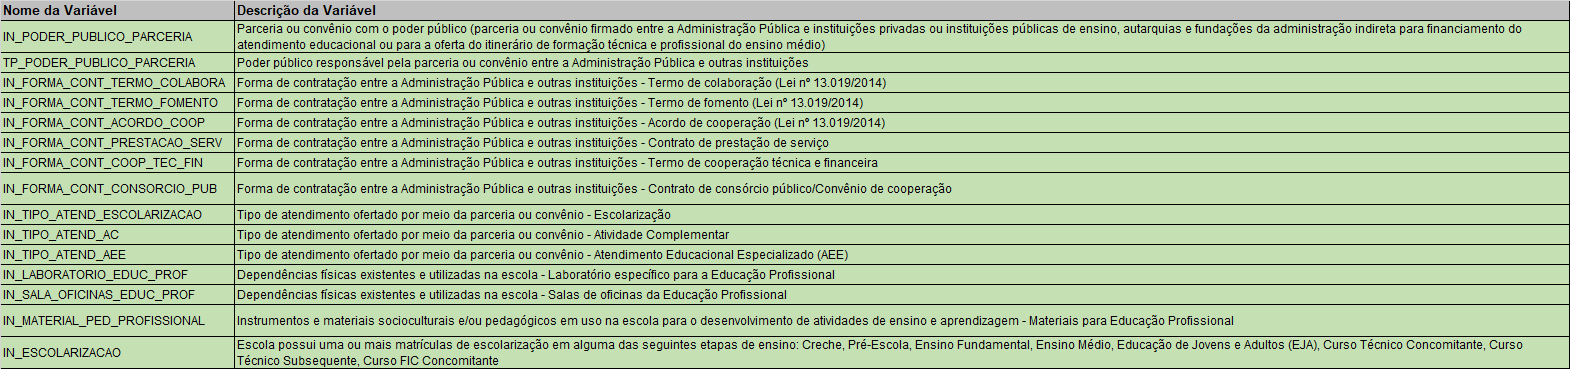

In [33]:
# Com o auxílio da função append do Pandas vamos concatenar nossos data frames

df_censo = pd.concat([df_2022], ignore_index=True)

Uma vez anteriomente analisado que o data frame de 2022, possui 15 colunas a mais dos demais CENSOs passados, vamos ignora-los e unir todos os data frames de 2016 a 2022 em um único data frame, possibilitando um estudo amplo com uma série histórica maior. '''ESTA PARTE SÓ DEVE SER CONSIDERADA SE ANALISARMOS SE UTILIZARMOS TODOS OS DATA FRAMES, A PRIORE UTILIZAREMOS O DE 2022'''

## 5.1 - Reestruturação da Análise Exploratória

## 5.2 - Exploração inicial do Data Frame

In [ ]:
'''# Liberando espaço do Gooble Colabs apagando a referencia aos antigos csv's
del csv_2019,csv_2020,csv_2021,csv_2022

# Liberando espaço do Gooble Colabs apagando os antigos data frames
del df_2019,df_2020,df_2021,df_2022



Uma vez unidos os data frames de 2016 a 2022, gerando uma base histórica única (df_censo), vamos conferir a quantidade de registroe e colunas.

In [34]:
#Leitura das primeiras linhas conferindo o inicio do arquivo
print(df_censo.head())


   NU_ANO_CENSO NO_REGIAO  CO_REGIAO     NO_UF SG_UF  CO_UF  \
0          2022     Norte          1  Rondônia    RO     11   
1          2022     Norte          1  Rondônia    RO     11   
2          2022     Norte          1  Rondônia    RO     11   
3          2022     Norte          1  Rondônia    RO     11   
4          2022     Norte          1  Rondônia    RO     11   

            NO_MUNICIPIO  CO_MUNICIPIO     NO_MESORREGIAO  CO_MESORREGIAO  \
0  Alta Floresta D'Oeste       1100015  Leste Rondoniense               2   
1  Alta Floresta D'Oeste       1100015  Leste Rondoniense               2   
2  Alta Floresta D'Oeste       1100015  Leste Rondoniense               2   
3  Alta Floresta D'Oeste       1100015  Leste Rondoniense               2   
4  Alta Floresta D'Oeste       1100015  Leste Rondoniense               2   

   ... QT_TUR_FUND_AF  QT_TUR_MED  QT_TUR_PROF QT_TUR_PROF_TEC  QT_TUR_EJA  \
0  ...            0.0         0.0          0.0             0.0         0.0   
1 

In [35]:
#Leitura das ultimas linhas conferindo o fim do arquivo
df_censo.tail()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
224644,2022,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,1,...,1.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
224645,2022,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224646,2022,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224647,2022,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224648,2022,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Vamos analisar os dados gerais do data frame
df_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224649 entries, 0 to 224648
Columns: 385 entries, NU_ANO_CENSO to QT_TUR_ESP_CE
dtypes: float64(358), int64(11), object(16)
memory usage: 659.9+ MB


In [37]:
# Alguns dados estatísticos sobre o DataFrame oferecido pela biblioteca do pandas (aleatório, uma vez que a base possui muitas colunas)
print(df_censo.describe())


       NU_ANO_CENSO      CO_REGIAO          CO_UF  CO_MUNICIPIO  \
count      224649.0  224649.000000  224649.000000  2.246490e+05   
mean         2022.0       2.647040      30.259347  3.041188e+06   
std             0.0       1.022897       9.447640  9.484777e+05   
min          2022.0       1.000000      11.000000  1.100015e+06   
25%          2022.0       2.000000      23.000000  2.313005e+06   
50%          2022.0       3.000000      31.000000  3.112604e+06   
75%          2022.0       3.000000      35.000000  3.547304e+06   
max          2022.0       5.000000      53.000000  5.300108e+06   

       CO_MESORREGIAO  CO_MICRORREGIAO   CO_DISTRITO   CO_ENTIDADE  \
count   224649.000000    224649.000000  2.246490e+05  2.246490e+05   
mean         5.019159        19.830447  3.041188e+08  3.042829e+07   
std          3.872808        17.119943  9.484777e+07  9.449441e+06   
min          1.000000         1.000000  1.100015e+08  1.100002e+07   
25%          2.000000         7.000000  2.3130

Realizando uma leitura com a inclusão dos data frames de 2016 a 2022 estaríamos trabalhando com 1.608.985 de registros e 385 colunas iniciais, das quais iniciaremos uma limpeza (higienização) de colunas as quais não utilizaremos, assim como linhas de registros que não nos serão uteis , como de registros de entidades não privadas, colunas sem valores e linhas vazias. Todavia inicialmente trabalharemos com o DataFrame de 2022 que possui 385 colunas e 224.649 registros.

In [38]:
# Vamos iniciar a higienização, excluindo os 15 campos novos incluidos no CENSO de 2022 que para este momento não agregarão valor e ficaremos com as 370 colunas
# que são comuns aos demais censos
colNovoCENSO = ['IN_PODER_PUBLICO_PARCERIA','TP_PODER_PUBLICO_PARCERIA','IN_FORMA_CONT_TERMO_COLABORA','IN_FORMA_CONT_TERMO_FOMENTO','IN_FORMA_CONT_ACORDO_COOP','IN_FORMA_CONT_PRESTACAO_SERV','IN_FORMA_CONT_COOP_TEC_FIN','IN_FORMA_CONT_CONSORCIO_PUB','IN_TIPO_ATEND_ESCOLARIZACAO','IN_TIPO_ATEND_AC','IN_TIPO_ATEND_AEE','IN_LABORATORIO_EDUC_PROF','IN_SALA_OFICINAS_EDUC_PROF','IN_MATERIAL_PED_PROFISSIONAL','IN_ESCOLARIZACAO']
df_censo=df_censo.drop(colNovoCENSO,axis=1)



In [39]:
# Relendo a quantidade de colunas
df_censo.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,10.0,6.0,4.0,3.0,3.0,0.0
2,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0


Os dados do CENSO foram divididos em categorias(vide dicionário de dados), são estas:

*   Cadastro da Escola
*   Dados da escola
*   Dados de oferta de matrícula
*   Número de Matrículas na Educação Básica
*   Número de Matrículas na Educação Básica - Segundo o Gênero do Aluno
*   Número de Matrículas na Educação Básica - Segundo a Cor/Raça do Aluno
*   Número de Matrículas na Educação Básica - Segundo a Faixa Etária do Aluno
*   Número de Matrículas na Educação Básica - Segundo o Turno do Aluno
*   Número de Matrículas na Educação Básica - Tempo Integral (Turma com sete ou mais horas de duração diária)
*   Número de Docentes da Educação Básica
*   Número de Turmas de Educação Básica

Dentre estas categorias, vamos excluir colunas a priori não desnecessárias, que são referentes ao tipo de estrutura fisica das entidades e vamos ficar com as quantitativas e de subdvisão das entidades privadas e localização, as demais abaixo serão descartadas:

 'NU_DDD','NU_TELEFONE','IN_VINCULO_SECRETARIA_EDUCACAO','IN_VINCULO_SEGURANCA_PUBLICA','IN_VINCULO_SECRETARIA_SAUDE','IN_VINCULO_OUTRO_ORGAO',
'IN_CONVENIADA_PP','TP_CONVENIO_PODER_PUBLICO','NU_CNPJ_ESCOLA_PRIVADA','NU_CNPJ_MANTENEDORA','TP_RESPONSAVEL_REGULAMENTACAO','CO_ESCOLA_SEDE_VINCULADA',
'CO_IES_OFERTANTE','IN_LOCAL_FUNC_PREDIO_ESCOLAR','TP_OCUPACAO_PREDIO_ESCOLAR','IN_LOCAL_FUNC_SALAS_EMPRESA','IN_LOCAL_FUNC_SOCIOEDUCATIVO',
'IN_LOCAL_FUNC_UNID_PRISIONAL','IN_LOCAL_FUNC_PRISIONAL_SOCIO','IN_LOCAL_FUNC_CASA_PROFESSOR','IN_LOCAL_FUNC_GALPAO','TP_OCUPACAO_GALPAO',
'IN_LOCAL_FUNC_SALAS_OUTRA_ESC','IN_LOCAL_FUNC_OUTROS','IN_PREDIO_COMPARTILHADO','IN_AGUA_FILTRADA','IN_AGUA_POTAVEL','IN_AGUA_REDE_PUBLICA',
'IN_AGUA_POCO_ARTESIANO','IN_AGUA_CACIMBA','IN_AGUA_FONTE_RIO','IN_AGUA_INEXISTENTE','IN_ENERGIA_REDE_PUBLICA','IN_ENERGIA_GERADOR',
'IN_ENERGIA_GERADOR_FOSSIL','IN_ENERGIA_OUTROS','IN_ENERGIA_RENOVAVEL','IN_ENERGIA_INEXISTENTE','IN_ESGOTO_REDE_PUBLICA','IN_ESGOTO_FOSSA_SEPTICA','IN_ESGOTO_FOSSA_COMUM','IN_ESGOTO_FOSSA',
'IN_ESGOTO_INEXISTENTE','IN_LIXO_SERVICO_COLETA','IN_LIXO_QUEIMA','IN_LIXO_ENTERRA','IN_LIXO_DESTINO_FINAL_PUBLICO','IN_LIXO_DESCARTA_OUTRA_AREA',
'IN_LIXO_JOGA_OUTRA_AREA','IN_LIXO_OUTROS','IN_LIXO_RECICLA','IN_TRATAMENTO_LIXO_SEPARACAO','IN_TRATAMENTO_LIXO_REUTILIZA','IN_TRATAMENTO_LIXO_RECICLAGEM',
'IN_TRATAMENTO_LIXO_INEXISTENTE','IN_ALMOXARIFADO','IN_AREA_VERDE','IN_AUDITORIO','IN_BANHEIRO_FORA_PREDIO','IN_BANHEIRO_DENTRO_PREDIO','IN_BANHEIRO',
'IN_BANHEIRO_EI','IN_BANHEIRO_PNE','IN_BANHEIRO_FUNCIONARIOS','IN_BANHEIRO_CHUVEIRO','IN_BERCARIO','IN_BIBLIOTECA','IN_BIBLIOTECA_SALA_LEITURA','IN_COZINHA',
'IN_DESPENSA','IN_DORMITORIO_ALUNO','IN_DORMITORIO_PROFESSOR','IN_LABORATORIO_CIENCIAS','IN_PATIO_COBERTO','IN_PATIO_DESCOBERTO','IN_PARQUE_INFANTIL',
'IN_PISCINA','IN_QUADRA_ESPORTES','IN_QUADRA_ESPORTES_COBERTA','IN_QUADRA_ESPORTES_DESCOBERTA','IN_REFEITORIO','IN_SALA_ATELIE_ARTES','IN_SALA_ESTUDIO_DANCA',
'IN_SALA_MULTIUSO','IN_SALA_DIRETORIA','IN_SALA_LEITURA','IN_SALA_PROFESSOR','IN_SALA_REPOUSO_ALUNO','IN_SECRETARIA','IN_TERREIRAO','IN_VIVEIRO',
'IN_DEPENDENCIAS_PNE','IN_LAVANDERIA','IN_DEPENDENCIAS_OUTRAS','IN_ACESSIBILIDADE_CORRIMAO','IN_ACESSIBILIDADE_ELEVADOR','IN_ACESSIBILIDADE_PISOS_TATEIS',
'IN_ACESSIBILIDADE_VAO_LIVRE','IN_ACESSIBILIDADE_RAMPAS','IN_ACESSIBILIDADE_SINAL_SONORO','IN_ACESSIBILIDADE_SINAL_TATIL','IN_ACESSIBILIDADE_SINAL_VISUAL',
'IN_ACESSIBILIDADE_INEXISTENTE','QT_SALAS_UTILIZADAS_DENTRO','QT_SALAS_UTILIZADAS_FORA','QT_SALAS_UTILIZA_CLIMATIZADAS','QT_SALAS_UTILIZADAS_ACESSIVEIS',
'IN_EQUIP_PARABOLICA','IN_COMPUTADOR','IN_EQUIP_COPIADORA','IN_EQUIP_IMPRESSORA','IN_EQUIP_IMPRESSORA_MULT','IN_EQUIP_SCANNER','IN_EQUIP_NENHUM',
'IN_EQUIP_DVD','QT_EQUIP_DVD','IN_EQUIP_SOM','QT_EQUIP_SOM','IN_EQUIP_TV','QT_EQUIP_TV','IN_EQUIP_LOUSA_DIGITAL','QT_EQUIP_LOUSA_DIGITAL',
'IN_EQUIP_MULTIMIDIA','QT_EQUIP_MULTIMIDIA','IN_EQUIP_VIDEOCASSETE','IN_EQUIP_RETROPROJETOR','IN_EQUIP_FAX','IN_EQUIP_FOTO','QT_EQUIP_VIDEOCASSETE',
'QT_EQUIP_PARABOLICA','QT_EQUIP_COPIADORA','QT_EQUIP_RETROPROJETOR','QT_EQUIP_IMPRESSORA','QT_EQUIP_IMPRESSORA_MULT','QT_EQUIP_FAX','QT_EQUIP_FOTO',
'IN_INTERNET_ADMINISTRATIVO','IN_INTERNET_COMUNIDADE','TP_REDE_LOCAL','IN_BANDA_LARGA','IN_PROF_ADMINISTRATIVOS','QT_PROF_ADMINISTRATIVOS','IN_PROF_SERVICOS_GERAIS',
'QT_PROF_SERVICOS_GERAIS','IN_PROF_BIBLIOTECARIO','QT_PROF_BIBLIOTECARIO','IN_PROF_SAUDE','QT_PROF_SAUDE','IN_PROF_COORDENADOR','QT_PROF_COORDENADOR',
'IN_PROF_FONAUDIOLOGO','QT_PROF_FONAUDIOLOGO','IN_PROF_NUTRICIONISTA','QT_PROF_NUTRICIONISTA','IN_PROF_PSICOLOGO','QT_PROF_PSICOLOGO','IN_PROF_ALIMENTACAO',
'QT_PROF_ALIMENTACAO','IN_PROF_PEDAGOGIA','QT_PROF_PEDAGOGIA','IN_PROF_SECRETARIO','QT_PROF_SECRETARIO','IN_PROF_SEGURANCA','QT_PROF_SEGURANCA','IN_PROF_MONITORES',
'QT_PROF_MONITORES','IN_PROF_GESTAO','QT_PROF_GESTAO','IN_PROF_ASSIST_SOCIAL','QT_PROF_ASSIST_SOCIAL','IN_ALIMENTACAO','IN_MATERIAL_PED_DESPORTIVA',
'IN_MATERIAL_PED_INDIGENA','IN_MATERIAL_PED_ETNICO','IN_MATERIAL_PED_CAMPO','IN_MATERIAL_PED_NENHUM','IN_MATERIAL_ESP_QUILOMBOLA','IN_MATERIAL_ESP_INDIGENA',
'IN_MATERIAL_ESP_NAO_UTILIZA','TP_INDIGENA_LINGUA','CO_LINGUA_INDIGENA_1','CO_LINGUA_INDIGENA_2','CO_LINGUA_INDIGENA_3','IN_REDES_SOCIAIS',
'IN_ESPACO_ATIVIDADE','IN_ESPACO_EQUIPAMENTO','IN_ORGAO_ASS_PAIS','IN_ORGAO_ASS_PAIS_MESTRES','IN_ORGAO_CONSELHO_ESCOLAR','IN_ORGAO_GREMIO_ESTUDANTIL',
'IN_ORGAO_OUTROS','IN_ORGAO_NENHUM','TP_PROPOSTA_PEDAGOGICA','TP_AEE','TP_ATIVIDADE_COMPLEMENTAR','IN_PROF','IN_PROF_TEC','IN_EJA','IN_EJA_FUND',
'IN_EJA_MED','IN_ESP','IN_ESP_CC','IN_ESP_CE','QT_MAT_PROF_TEC','QT_MAT_EJA','QT_MAT_EJA_FUND','QT_MAT_EJA_MED','QT_MAT_ESP','QT_MAT_ESP_CC','QT_MAT_ESP_CE'






In [40]:
# Excluindo outras colunas que não utilizaremos a priori, pois são dados interligados em sua maioria a analise de estrutura
# física e dos ambiente das instituições.

colexpurgoCENSO = ['NU_DDD','NU_TELEFONE','IN_VINCULO_SECRETARIA_EDUCACAO','IN_VINCULO_SEGURANCA_PUBLICA','IN_VINCULO_SECRETARIA_SAUDE','IN_VINCULO_OUTRO_ORGAO',
'IN_CONVENIADA_PP','TP_CONVENIO_PODER_PUBLICO','NU_CNPJ_ESCOLA_PRIVADA','NU_CNPJ_MANTENEDORA','TP_RESPONSAVEL_REGULAMENTACAO','CO_ESCOLA_SEDE_VINCULADA',
'CO_IES_OFERTANTE','IN_LOCAL_FUNC_PREDIO_ESCOLAR','TP_OCUPACAO_PREDIO_ESCOLAR','IN_LOCAL_FUNC_SALAS_EMPRESA','IN_LOCAL_FUNC_SOCIOEDUCATIVO',
'IN_LOCAL_FUNC_UNID_PRISIONAL','IN_LOCAL_FUNC_PRISIONAL_SOCIO','IN_LOCAL_FUNC_CASA_PROFESSOR','IN_LOCAL_FUNC_GALPAO','TP_OCUPACAO_GALPAO',
'IN_LOCAL_FUNC_SALAS_OUTRA_ESC','IN_LOCAL_FUNC_OUTROS','IN_PREDIO_COMPARTILHADO','IN_AGUA_FILTRADA','IN_AGUA_POTAVEL','IN_AGUA_REDE_PUBLICA',
'IN_AGUA_POCO_ARTESIANO','IN_AGUA_CACIMBA','IN_AGUA_FONTE_RIO','IN_AGUA_INEXISTENTE','IN_ENERGIA_REDE_PUBLICA','IN_ENERGIA_GERADOR',
'IN_ENERGIA_GERADOR_FOSSIL','IN_ENERGIA_OUTROS','IN_ENERGIA_RENOVAVEL','IN_ENERGIA_INEXISTENTE','IN_ESGOTO_REDE_PUBLICA','IN_ESGOTO_FOSSA_SEPTICA','IN_ESGOTO_FOSSA_COMUM','IN_ESGOTO_FOSSA',
'IN_ESGOTO_INEXISTENTE','IN_LIXO_SERVICO_COLETA','IN_LIXO_QUEIMA','IN_LIXO_ENTERRA','IN_LIXO_DESTINO_FINAL_PUBLICO','IN_LIXO_DESCARTA_OUTRA_AREA',
'IN_LIXO_JOGA_OUTRA_AREA','IN_LIXO_OUTROS','IN_LIXO_RECICLA','IN_TRATAMENTO_LIXO_SEPARACAO','IN_TRATAMENTO_LIXO_REUTILIZA','IN_TRATAMENTO_LIXO_RECICLAGEM',
'IN_TRATAMENTO_LIXO_INEXISTENTE','IN_ALMOXARIFADO','IN_AREA_VERDE','IN_AUDITORIO','IN_BANHEIRO_FORA_PREDIO','IN_BANHEIRO_DENTRO_PREDIO','IN_BANHEIRO',
'IN_BANHEIRO_EI','IN_BANHEIRO_PNE','IN_BANHEIRO_FUNCIONARIOS','IN_BANHEIRO_CHUVEIRO','IN_BERCARIO','IN_BIBLIOTECA','IN_BIBLIOTECA_SALA_LEITURA','IN_COZINHA',
'IN_DESPENSA','IN_DORMITORIO_ALUNO','IN_DORMITORIO_PROFESSOR','IN_LABORATORIO_CIENCIAS','IN_PATIO_COBERTO','IN_PATIO_DESCOBERTO','IN_PARQUE_INFANTIL',
'IN_PISCINA','IN_QUADRA_ESPORTES','IN_QUADRA_ESPORTES_COBERTA','IN_QUADRA_ESPORTES_DESCOBERTA','IN_REFEITORIO','IN_SALA_ATELIE_ARTES','IN_SALA_ESTUDIO_DANCA',
'IN_SALA_MULTIUSO','IN_SALA_DIRETORIA','IN_SALA_LEITURA','IN_SALA_PROFESSOR','IN_SALA_REPOUSO_ALUNO','IN_SECRETARIA','IN_TERREIRAO','IN_VIVEIRO',
'IN_DEPENDENCIAS_PNE','IN_LAVANDERIA','IN_DEPENDENCIAS_OUTRAS','IN_ACESSIBILIDADE_CORRIMAO','IN_ACESSIBILIDADE_ELEVADOR','IN_ACESSIBILIDADE_PISOS_TATEIS',
'IN_ACESSIBILIDADE_VAO_LIVRE','IN_ACESSIBILIDADE_RAMPAS','IN_ACESSIBILIDADE_SINAL_SONORO','IN_ACESSIBILIDADE_SINAL_TATIL','IN_ACESSIBILIDADE_SINAL_VISUAL',
'IN_ACESSIBILIDADE_INEXISTENTE','QT_SALAS_UTILIZADAS_DENTRO','QT_SALAS_UTILIZADAS_FORA','QT_SALAS_UTILIZA_CLIMATIZADAS','QT_SALAS_UTILIZADAS_ACESSIVEIS',
'IN_EQUIP_PARABOLICA','IN_COMPUTADOR','IN_EQUIP_COPIADORA','IN_EQUIP_IMPRESSORA','IN_EQUIP_IMPRESSORA_MULT','IN_EQUIP_SCANNER','IN_EQUIP_NENHUM',
'IN_EQUIP_DVD','QT_EQUIP_DVD','IN_EQUIP_SOM','QT_EQUIP_SOM','IN_EQUIP_TV','QT_EQUIP_TV','IN_EQUIP_LOUSA_DIGITAL','QT_EQUIP_LOUSA_DIGITAL',
'IN_EQUIP_MULTIMIDIA','QT_EQUIP_MULTIMIDIA','IN_EQUIP_VIDEOCASSETE','IN_EQUIP_RETROPROJETOR','IN_EQUIP_FAX','IN_EQUIP_FOTO','QT_EQUIP_VIDEOCASSETE',
'QT_EQUIP_PARABOLICA','QT_EQUIP_COPIADORA','QT_EQUIP_RETROPROJETOR','QT_EQUIP_IMPRESSORA','QT_EQUIP_IMPRESSORA_MULT','QT_EQUIP_FAX','QT_EQUIP_FOTO',
'IN_INTERNET_ADMINISTRATIVO','IN_INTERNET_COMUNIDADE','TP_REDE_LOCAL','IN_BANDA_LARGA','IN_PROF_ADMINISTRATIVOS','QT_PROF_ADMINISTRATIVOS','IN_PROF_SERVICOS_GERAIS',
'QT_PROF_SERVICOS_GERAIS','IN_PROF_BIBLIOTECARIO','QT_PROF_BIBLIOTECARIO','IN_PROF_SAUDE','QT_PROF_SAUDE','IN_PROF_COORDENADOR','QT_PROF_COORDENADOR',
'IN_PROF_FONAUDIOLOGO','QT_PROF_FONAUDIOLOGO','IN_PROF_NUTRICIONISTA','QT_PROF_NUTRICIONISTA','IN_PROF_PSICOLOGO','QT_PROF_PSICOLOGO','IN_PROF_ALIMENTACAO',
'QT_PROF_ALIMENTACAO','IN_PROF_PEDAGOGIA','QT_PROF_PEDAGOGIA','IN_PROF_SECRETARIO','QT_PROF_SECRETARIO','IN_PROF_SEGURANCA','QT_PROF_SEGURANCA','IN_PROF_MONITORES',
'QT_PROF_MONITORES','IN_PROF_GESTAO','QT_PROF_GESTAO','IN_PROF_ASSIST_SOCIAL','QT_PROF_ASSIST_SOCIAL','IN_ALIMENTACAO','IN_MATERIAL_PED_DESPORTIVA',
'IN_MATERIAL_PED_INDIGENA','IN_MATERIAL_PED_ETNICO','IN_MATERIAL_PED_CAMPO','IN_MATERIAL_PED_NENHUM','IN_MATERIAL_ESP_QUILOMBOLA','IN_MATERIAL_ESP_INDIGENA',
'IN_MATERIAL_ESP_NAO_UTILIZA','TP_INDIGENA_LINGUA','CO_LINGUA_INDIGENA_1','CO_LINGUA_INDIGENA_2','CO_LINGUA_INDIGENA_3','IN_REDES_SOCIAIS',
'IN_ESPACO_ATIVIDADE','IN_ESPACO_EQUIPAMENTO','IN_ORGAO_ASS_PAIS','IN_ORGAO_ASS_PAIS_MESTRES','IN_ORGAO_CONSELHO_ESCOLAR','IN_ORGAO_GREMIO_ESTUDANTIL',
'IN_ORGAO_OUTROS','IN_ORGAO_NENHUM','TP_PROPOSTA_PEDAGOGICA','TP_AEE','TP_ATIVIDADE_COMPLEMENTAR','IN_PROF','IN_PROF_TEC','IN_EJA','IN_EJA_FUND',
'IN_EJA_MED','IN_ESP','IN_ESP_CC','IN_ESP_CE','QT_MAT_PROF_TEC','QT_MAT_EJA','QT_MAT_EJA_FUND','QT_MAT_EJA_MED','QT_MAT_ESP','QT_MAT_ESP_CC','QT_MAT_ESP_CE'
]
df_censo = df_censo.drop(colexpurgoCENSO,axis=1)



In [41]:
#Vamos apagar também todas as colunas que contem somente NaN

df_censo = df_censo.dropna(axis=1, how='all')

Com a exclusão das colunas acima trabalharemos com um menor número de colunas, mas ainda utilizaremos todos os registros que contém informações de entidades particulares e públicas, afim de mensurar nosso universo de dados.

In [42]:
df_censo.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,10.0,6.0,4.0,3.0,3.0,0.0
2,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0


In [43]:
df_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224649 entries, 0 to 224648
Columns: 146 entries, NU_ANO_CENSO to QT_TUR_ESP_CE
dtypes: float64(121), int64(11), object(14)
memory usage: 250.2+ MB


In [44]:
#verificando colunas com valores nulos
df_censo.isnull().sum()

NU_ANO_CENSO           0
NO_REGIAO              0
CO_REGIAO              0
NO_UF                  0
SG_UF                  0
                   ...  
QT_TUR_EJA_FUND    46303
QT_TUR_EJA_MED     46303
QT_TUR_ESP         46303
QT_TUR_ESP_CC      46303
QT_TUR_ESP_CE      46303
Length: 146, dtype: int64

Temos acima alguns campos que ainda estão sem valor, devido a ausência de dados no censo.

In [45]:
#Conferindo  a cituação atual do Data Frame
df_censo.shape

(224649, 146)

In [46]:
#Criando um loop para realizar uma leitura individual de cada coluna, trazendo o nome, valores unicos e tipo das mesmas para uma analise
for col in df_censo.columns:
    if len(df_censo[col].unique()) < 10:
        print(col,df_censo[col].unique(),df_censo[col].dtypes)

NU_ANO_CENSO [2022] int64
NO_REGIAO ['Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste'] object
CO_REGIAO [1 2 3 4 5] int64
TP_DEPENDENCIA [2 3 4 1] int64
TP_CATEGORIA_ESCOLA_PRIVADA [nan  4.  1.  3.  2.] float64
TP_LOCALIZACAO [2 1] int64
TP_LOCALIZACAO_DIFERENCIADA [ 2.  0. nan  1.  3.] float64
TP_SITUACAO_FUNCIONAMENTO [1 2 3] int64
IN_MANT_ESCOLA_PRIVADA_EMP [nan  0.  1.] float64
IN_MANT_ESCOLA_PRIVADA_ONG [nan  0.  1.] float64
IN_MANT_ESCOLA_PRIVADA_OSCIP [nan  0.  1.] float64
IN_MANT_ESCOLA_PRIV_ONG_OSCIP [nan  0.  1.] float64
IN_MANT_ESCOLA_PRIVADA_SIND [nan  0.  1.] float64
IN_MANT_ESCOLA_PRIVADA_SIST_S [nan  0.  1.] float64
IN_MANT_ESCOLA_PRIVADA_S_FINS [nan  1.  0.] float64
TP_REGULAMENTACAO [ 1. nan  2.  0.] float64
IN_LABORATORIO_INFORMATICA [ 0.  1. nan] float64
IN_SALA_MUSICA_CORAL [ 0. nan  1.] float64
IN_SALA_ATENDIMENTO_ESPECIAL [ 0.  1. nan] float64
IN_DESKTOP_ALUNO [ 0.  1. nan] float64
IN_COMP_PORTATIL_ALUNO [ 0.  1. nan] float64
IN_TABLET_ALUNO [ 0. nan  1.] float64

Como analisado acima, nossa limpeza inicial foi bem sucedida, temos colunas com valores únicos e sem campos nullos.

Como o foco do nosso estudo são as entidades privadas, vamos começar a analisar como se encontram os dados no campo TP_DEPENDENCIA, que segundo o dicionário de dados classifica os tipos em :
1 - Federal
2 - Estadual
3 - Municipal
4 - Privada

In [47]:
#Leitura quantitativa do campo

df_censo['TP_DEPENDENCIA'].value_counts()

3    132629
4     57825
2     33460
1       735
Name: TP_DEPENDENCIA, dtype: int64

Como observado acima, teremos que trocar estes códigos pelos nomes dos dicionário, código abaixo:

In [51]:
# Mapear os valores na coluna 'TP_DEPENDENCIA'
mapeamento = {
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
}
df_censo['TP_DEPENDENCIA'] = df_censo['TP_DEPENDENCIA'].replace(mapeamento)

#Releitura quantitativa do campo TP_DEPENDENCIA
df_censo['TP_DEPENDENCIA'].value_counts()

Municipal    132629
Privada       57825
Estadual      33460
Federal         735
Name: TP_DEPENDENCIA, dtype: int64

Analisando o dicionário de dados, vê-se a necessidade de realizar o tratamento acima para outros campos relacionados às entidades, tais como:

*   TP_CATEGORIA_ESCOLA_PRIVADA
*   TP_SITUACAO_FUNCIONAMENTO

Tratamento realizado abaixo:

In [53]:
# Mapear os valores na coluna 'TP_CATEGORIA_ESCOLA_PRIVADA'
mapeamento = {
    1.0: 'Particular',
    2.0: 'Comunitária',
    3.0: 'Confessional',
    4.0: 'Filantrópica'
    }
df_censo['TP_CATEGORIA_ESCOLA_PRIVADA'] = df_censo['TP_CATEGORIA_ESCOLA_PRIVADA'].replace(mapeamento)

# Leitura do DataFrame após a substituição
df_censo['TP_CATEGORIA_ESCOLA_PRIVADA'].value_counts()

Particular      31174
Filantrópica     8260
Comunitária      2004
Confessional      321
Name: TP_CATEGORIA_ESCOLA_PRIVADA, dtype: int64

In [54]:
# Mapear os valores na coluna 'TP_SITUACAO_FUNCIONAMENTO'
mapeamento = {
    1: 'Em Atividade',
    2: 'Paralisada',
    3: 'Extinta (ano do Censo)',
    4: 'Extinta em Anos Anteriores'
    }
df_censo['TP_SITUACAO_FUNCIONAMENTO'] = df_censo['TP_SITUACAO_FUNCIONAMENTO'].replace(mapeamento)

# Leitura do DataFrame após a substituição
df_censo['TP_SITUACAO_FUNCIONAMENTO'].value_counts()

Em Atividade              184332
Paralisada                 36526
Extinta (ano do Censo)      3791
Name: TP_SITUACAO_FUNCIONAMENTO, dtype: int64

## 5.3 - Pré analise de escolas privadas

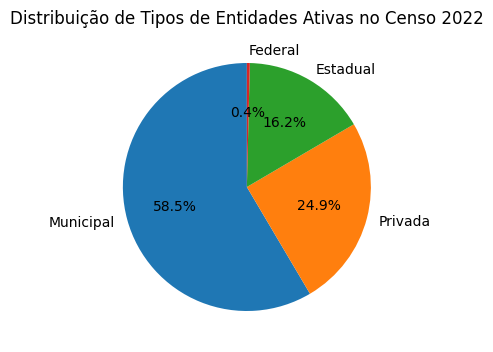

In [67]:
#Comparativo de entidades Particulares X Demais (ativas)
# Contando o número de linhas para cada tipo na coluna 'TIPO' e filtrando somente as ativas

df_filtrado = df_censo[df_censo['TP_SITUACAO_FUNCIONAMENTO'] == 'Em Atividade']
contagem_dependencia = df_filtrado['TP_DEPENDENCIA'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(4, 8))
plt.pie(contagem_dependencia, labels=contagem_dependencia.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Tipos de Entidades Ativas no Censo 2022')
plt.show()

Do censo 2022, podemos observar que temos um mercado de 24,9% de escolas de ensino privado, sendo este o nosso foco de pesquisa.


Com todos os filtros e limpezas realizadas vamos trabalhar agora com um data frame que inclui somente as entidades privadas em funcionamento pelo censo.

In [ ]:
#Criando novo data frame somente com escolas de ensino privado e ativas
df_pv = df_censo[(df_censo['TP_DEPENDENCIA'] == 'Privada') & (df_censo['TP_SITUACAO_FUNCIONAMENTO'] == 'Em Atividade')]
df_pv = df_pv.reset_index(drop=True)
#print(df_pv.head(5))



In [74]:
df_pv.shape

(45977, 146)

Existe uma subdivisão na categoria de escolas privadas, conforme vemos abaixo

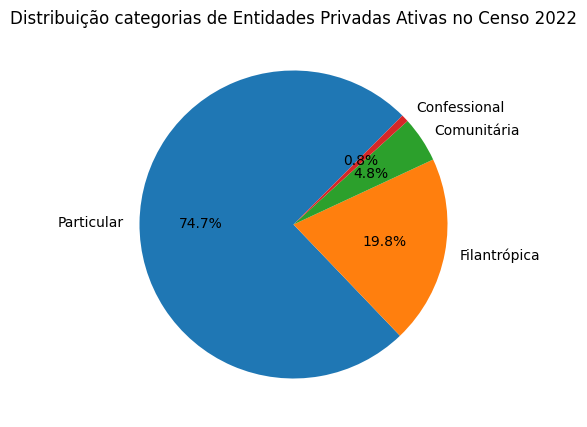

In [94]:
# Contando o número de linhas para cada tipo na coluna 'TP_CATEGORIA_ESCOLA_PRIVADA'
cat_priv = df_pv['TP_CATEGORIA_ESCOLA_PRIVADA'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 5))
plt.pie(cat_priv, labels=cat_priv.index, autopct='%1.1f%%', startangle=45)
plt.title('Distribuição categorias de Entidades Privadas Ativas no Censo 2022')
plt.show()

Do nosso conjuto de escolas privadas vamos focar nossos esforços na do tipo **particular** que representam 74,7% dos tipos de escolas privadas, alterando nosso dataFrame para assumir somentes estas entidades ativas, privadas e do tipo particular.


In [97]:
df_pv['TP_DEPENDENCIA'].value_counts()

Privada    45977
Name: TP_DEPENDENCIA, dtype: int64

In [100]:
# Alterando data frame com os filtros finais

df_pvp = df_pv[(df_pv['TP_DEPENDENCIA'] == 'Privada')  & (df_pv['TP_CATEGORIA_ESCOLA_PRIVADA'] == 'Particular') & (df_pv['TP_SITUACAO_FUNCIONAMENTO'] == 'Em Atividade')]

# Reindexar o novo DataFrame
df_pvp = df_pvp.reset_index(drop=True)


### Releitura da analise exploratória do Data Frame Final

In [ ]:
#Ralizando novas analises
df_pvp.head(5)

In [ ]:
#Estatísticas do data Frame
print(df_pvp.describe())

In [ ]:
# Verificando valores unicos e suas contagens
print(df_pvp.nunique())

In [ ]:
df_pvp.corr()

In [ ]:
# Tp 10 entidades particulares com maior número de matricula
df_part =df_pv[df_pv['TP_CATEGORIA_ESCOLA_PRIVADA']==1.0].reset_index(drop=True)


In [ ]:
df_part.shape

(31174, 146)

In [ ]:
#Determinando TOP escolas com o maior número de matriculas utilizando os campos: NO_ENTIDADE /QT_MAT_BAS

df_part.groupby('NO_ENTIDADE')['QT_MAT_BAS'].sum().sort_values(ascending=False).nlargest(20)



NO_ENTIDADE
INSTITUTO MONITOR LTDA                                        53556.0
SENAC RIO GRANDE DO SUL                                       24164.0
SISTEMA ELITE DE ENSINO                                       15265.0
INSTITUTO BRASILEIRO DE EDUCACAO PROFISSIONAL ESTADO DE SP    10953.0
INSTITUTO TECNOLOGICO ASSESSORITEC                            10296.0
INSTITUTO BRASILEIRO DE ED PROFISSIONAL - IBREP                8950.0
ESCOLA SESI DE ENSINO MEDIO FRANCISCO XAVIER KUNST             8184.0
UNIDADE SESI RETIRO                                            7438.0
CENTRO DE PROFISSIONALIZACAO E EDUCACAO TECNICA                7315.0
COLEGIO SAGRADO CORACAO DE JESUS                               7257.0
INSTITUTO ATENEU                                               7242.0
INSTITUTO EDUCACIONAL MONITOR LTDA                             6778.0
ESCOLA TECNICA VENCER                                          6515.0
CENTRO DE ENSINO GRAU TECNICO                                  5871.0
COLEGIO 

In [ ]:

df_top10_matriculas = df_tmp.loc[df_tmp['QT_MAT_BAS'].nlargest(10).index]

KeyError: 'QT_MAT_BAS'

In [ ]:
#

#pd.DataFrame(df_tmp)
df_tmp.to_frame().reset_index()


,NO_ENTIDADE,QT_MAT_BAS
0,INSTITUTO MONITOR LTDA,53556.0
1,SENAC RIO GRANDE DO SUL,24164.0
2,SISTEMA ELITE DE ENSINO,15265.0
3,INSTITUTO BRASILEIRO DE EDUCACAO PROFISSIONAL ...,10953.0
4,INSTITUTO TECNOLOGICO ASSESSORITEC,10296.0
...,...,...
27703,FUNDHAS UNIDADE PETROBRAS CPO SAO JOSE,0.0
27704,ASSOCIACAO CASA DE CULTURA EDUARDO CABUS,0.0
27705,SENAI ARIPUANA,0.0
27706,ASSOCIACAO BRASILEIRA DE ODONTOLOGIA REGIONAL ...,0.0


# 6 - Análise Estatística

## *Descritiva*

## *Inferencial*

# 7 - Visualização de Dados

# 8 - Interpretação e Conclusões

In [ ]:
#Realizando una analise com base no arquivo do ultimo CENSO 2022
#